<a href="https://colab.research.google.com/github/wassima-manssour/california-house-price-prediction/blob/main/HousePricePrediction_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
#pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Load the dataset from Sklearn.datasets

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
print(housing.target_names)

['MedHouseVal']


In [ ]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

## Preparing The Dataset

In [ ]:
dataset = pd.DataFrame(housing.data, columns = housing.feature_names)

In [ ]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
dataset['Price'] = housing.target

In [ ]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Exploratory Data Analysis

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# Summarizing the stats of the data
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# Check missing values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

### Correlation
Also known as the Pearson coefficient
its a value between +1 and -1

* +1 means two attributes are highly correlated
* 0 means two attributes are not at all correlated
* -1 means two attributes are inversely correlated


The correlation coefficient only measures linear relationships

In [ ]:
# Correlation: how the independant features and the target feature are correlated
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [ ]:
# Check the multi-collinearity: hight correlation betwenn independant features
# -> Drop one feauture & leave the other


Text(0, 0.5, 'Price')

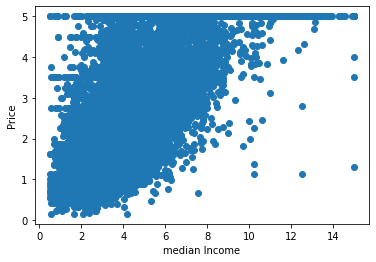

In [ ]:
plt.scatter(dataset['MedInc'],dataset['Price'])
plt.xlabel('median Income')
plt.ylabel('Price')

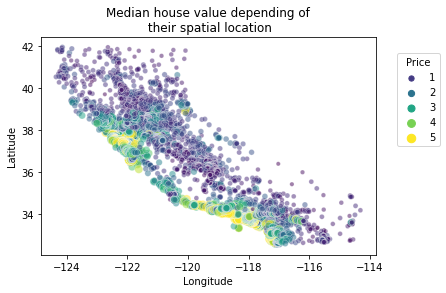

In [ ]:
import seaborn as sns
sns.scatterplot(data=dataset, x="Longitude", y="Latitude",
                size="Price", hue="Price",
                palette="viridis", alpha=0.5)
plt.legend(title="Price", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

If you are not familiar with the state of California, it is interesting to notice that all datapoints show a graphical representation of this state. We note that the high-valued houses will be located on the coast, where the big cities from California are located: San Diego, Los Angeles, San Jose, or San Francisco.

Text(0, 0.5, 'Latitude')

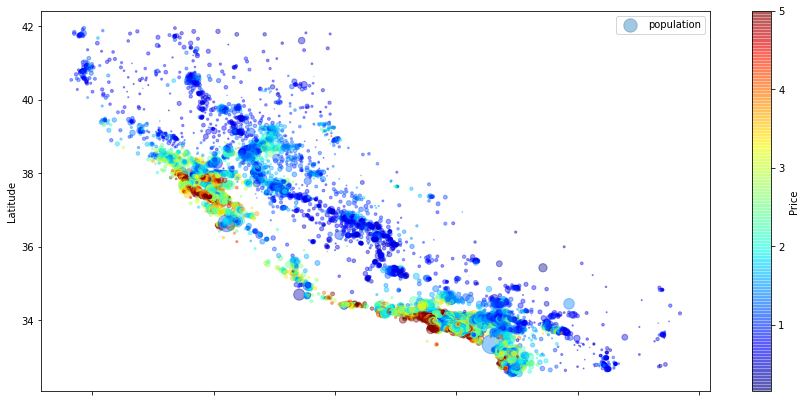

In [ ]:
dataset.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
            s=dataset["Population"]/100, label="population",
            c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
            figsize=(15,7))
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

* The radius of each circle represents the district’s population (option s)
* The color represents the price (option c).
* The predefined color map (option cmap) called jet,  ranges from blue (low values) to red (high prices)

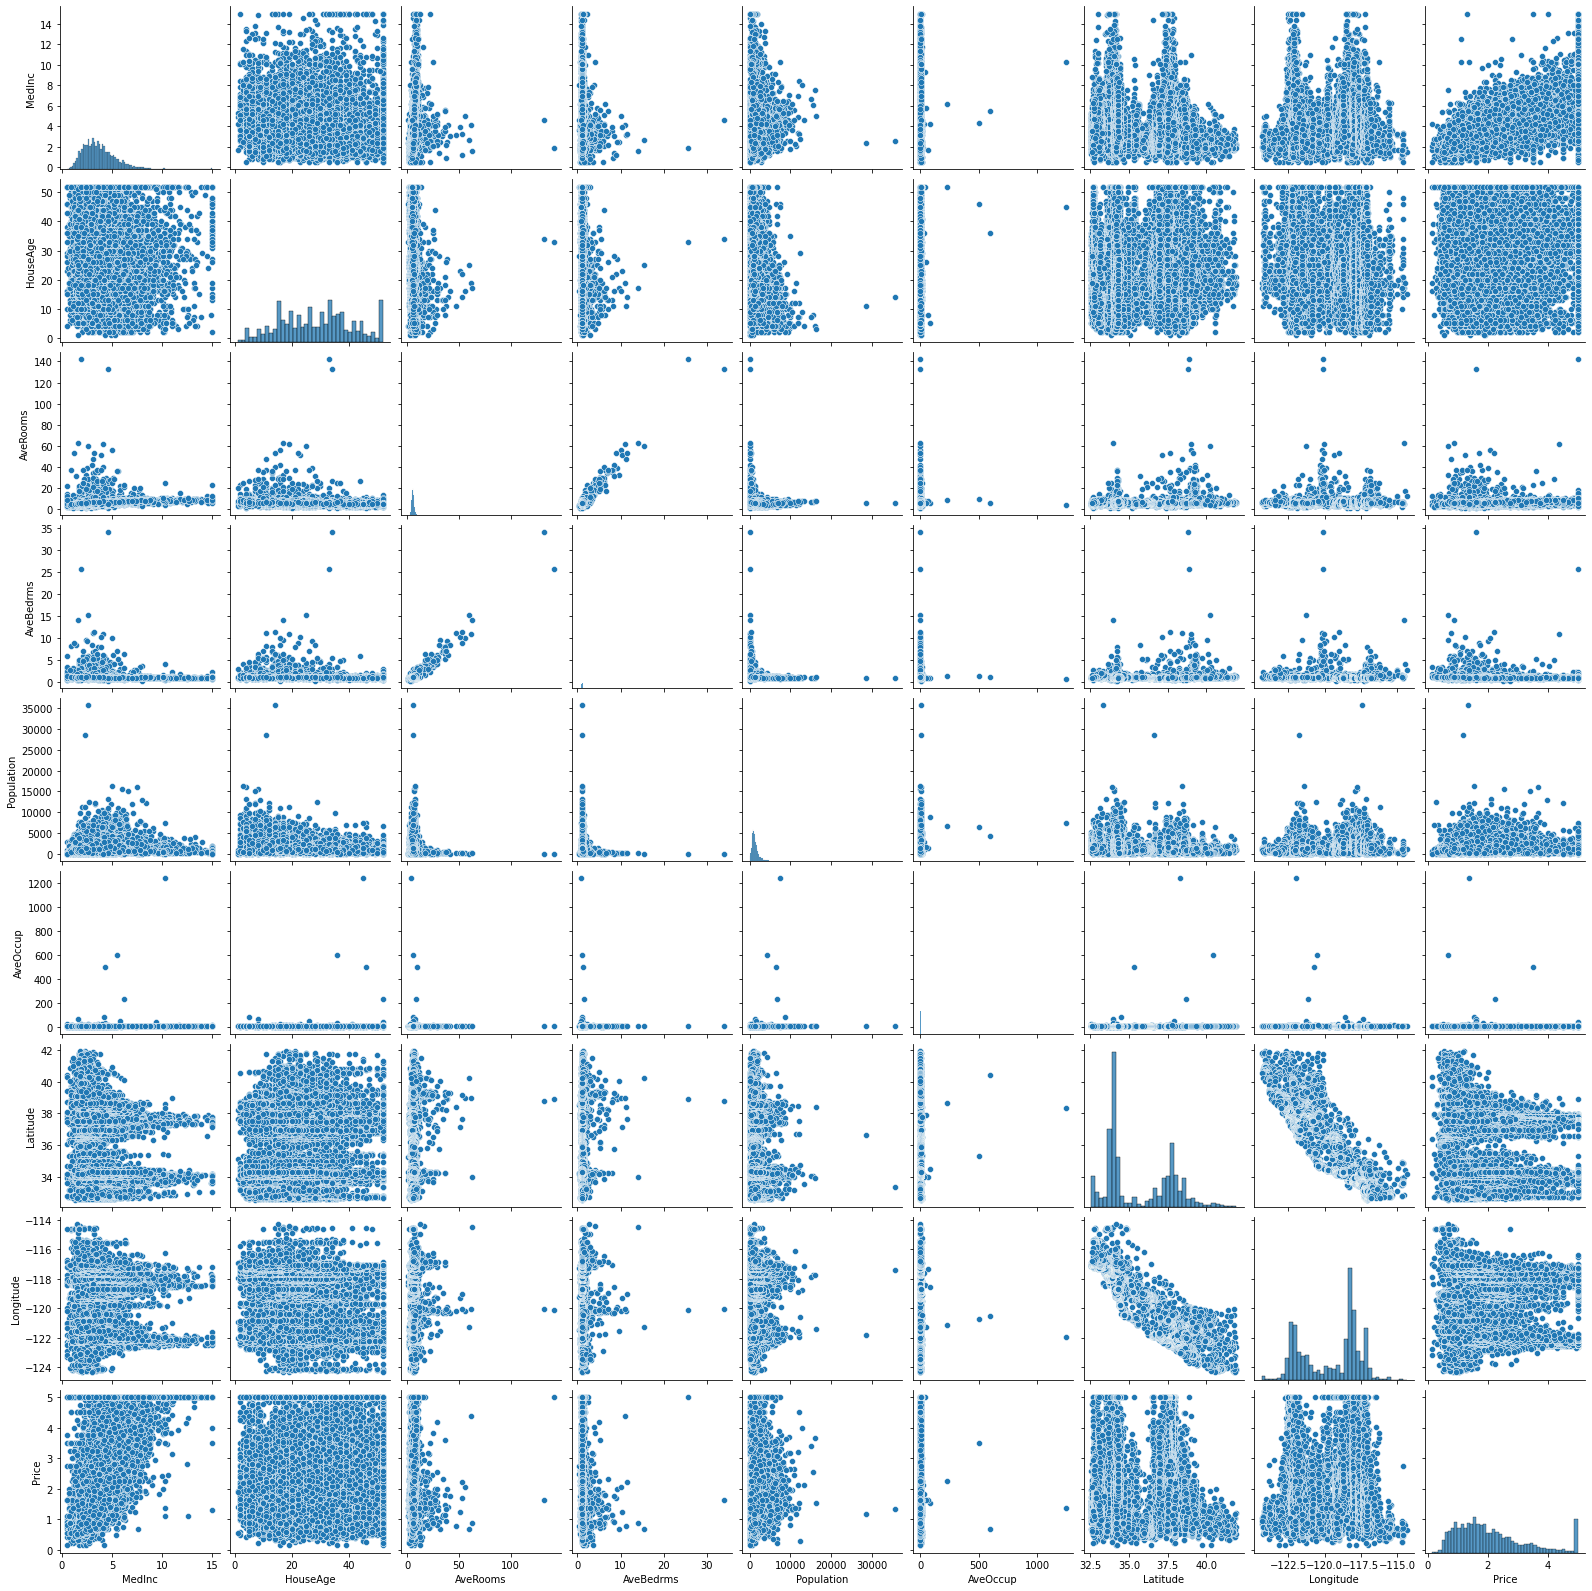

In [ ]:

sns.pairplot(dataset)

### Regression Plots

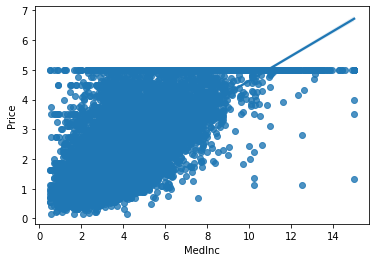

In [ ]:
#Create a regression plot
sns.regplot(x='MedInc',y='Price',data=dataset)

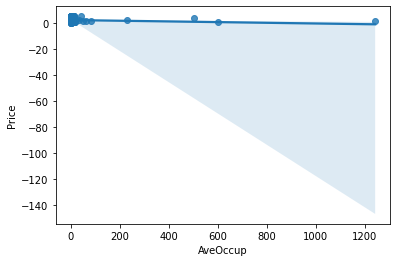

In [ ]:
sns.regplot(x='AveOccup',y='Price',data=dataset)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdabaa38a90>,
      dtype=object)

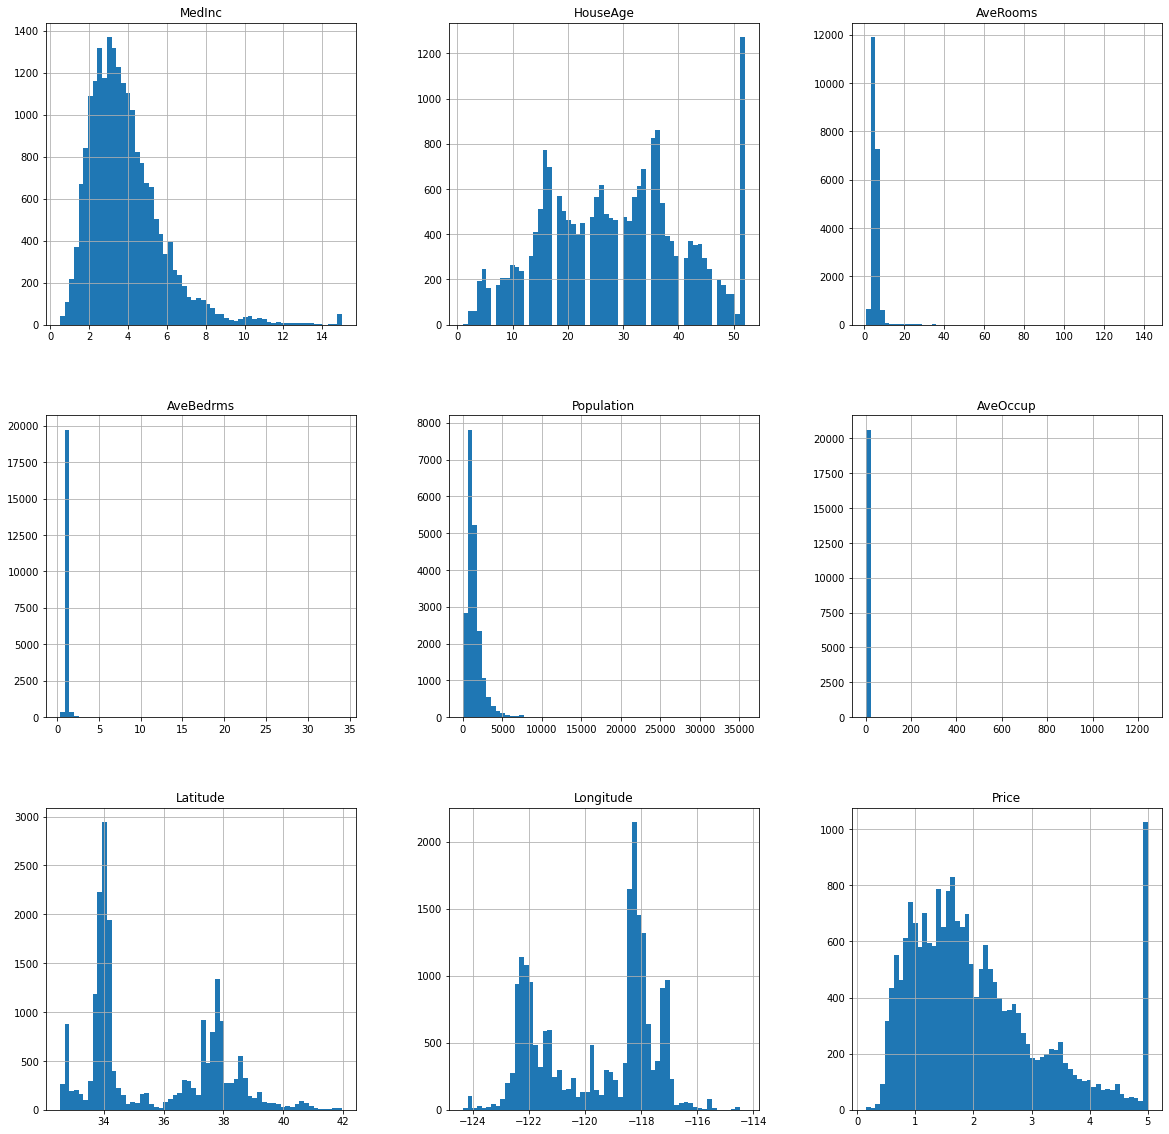

In [ ]:
dataset.hist(bins=60,figsize=(20,20))
#plt.show()


1. households - hmm, most districts have around 100-500 households. peak is around 4800
2. housing median age - well, not very bell-shaped, at 35 and 15 are two peaks. are these years? max peak is at 50. does this mean major houses in each district are more than 50 years old?!?
3. latitude - looks correct, at 34 and 37 degrees of latitude are major houses.
4. longitude - the same, at -122 and -118 degrees are major houses
5. median house value - hmm, this is what i need to predict. somewhat bell-shaped, at extreme right there is a surge, is y-axis dollars? does this mean most houses are above 500,000? 
6. median income - very bell-shaped, good distribution, but is this income in dollars? There is no income above 15 so some capping has been done. most people have income between 2-5
7. population - most districts have population below 3000
8. bedrooms - hmm, we have got bedrooms for a district? looks like most districts have between 300-600 bedrooms
9. total rooms - again similar to the previous two. most districts have around 3000 rooms   



### Advanced Analysis

In [ ]:
corr_matrix = dataset.corr()
#get the correlation between the indepandant features & the output one in ASCE order
corr_matrix["Price"].sort_values(ascending=False)

Price         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Price, dtype: float64

⏩
*   *The house price is highly correlated with the median income(where rich peaople live, the houses tend to be more expensive )*

*   *Negative correlation between the price and the latitude. It significe that as you move up north increasing the latitude, the house prices decrease.
We can conclude that houses in north are cheaper than the houses in the south of California.*



# Pre-Processing

## **Outliers**


> 💡 Outliers are very different values—abnormally low or abnormally high—their presence can often skew the results of statistical analyses on the dataset. This could lead to less effective and less useful models.

[Read more about **Outliers**](https://www.freecodecamp.org/news/how-to-detect-outliers-in-machine-learning/)



There are various ways to deal with outliers.
1. ***Droping the outliers*** by appling some conditions on features.
2. ***Marking the Outliers*** We can also mark the outliers and will not use that outliers in training the model.
3. ***Rescaling the data*** We can not use upper two methods when we have less data points in that case we can not afford to drop or mark the outliers. Here we can rescale the data so that the outliers can be used.

In the previous histogram, there is a peak in the distribution of the attributes **houseAge** and **Price**, which signifies a limit on the attribute's maximum value. 

These might be caused by how the data was collected; e.g. the survey's choice 'Prefer not to say', '>= 52', or '>= 500,001'.



[Scakling Data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)



### Sclaers

#### *RobustScaler* 

> Unlike the scalers *( StandardScaler, MinMaxScaler, MaxAbsScaler )*, the centering and scaling statistics of **RobustScaler** are based on percentiles and are therefore not influenced by a small number of very large marginal outliers.



In [ ]:
from sklearn import preprocessing 

In [ ]:
scaler = preprocessing.RobustScaler(quantile_range=(25, 75)).fit_transform(dataset)
dataset_scaled=pd.DataFrame(scaler, columns = dataset.columns)

In [ ]:
dataset_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,2.197582,0.631579,1.088935,-0.267221,-0.899787,-0.307981,0.957672,-0.986807,1.880448
1,2.186664,-0.421053,0.626066,-0.822926,1.316631,-0.830800,0.952381,-0.984169,1.232041
2,1.707732,1.210526,1.898042,0.263955,-0.714286,-0.018599,0.949735,-0.989446,1.187941
3,0.967177,1.210526,0.364978,0.259814,-0.648188,-0.316908,0.949735,-0.992084,1.113523
4,0.142854,1.210526,0.653191,0.345657,-0.640725,-0.746784,0.949735,-0.992084,1.119724
...,...,...,...,...,...,...,...,...,...
20635,-0.905796,-0.210526,-0.113966,0.904821,-0.342217,-0.302057,1.380952,-0.686016,-0.700086
20636,-0.448655,-0.578947,0.549064,2.857330,-0.863539,0.357401,1.383598,-0.717678,-0.706977
20637,-0.841709,-0.631579,-0.014635,0.763126,-0.169510,-0.577676,1.367725,-0.720317,-0.602239
20638,-0.765007,-0.578947,0.062286,1.317744,-0.453092,-0.815121,1.367725,-0.746702,-0.654608


# Data partitioning: train set and test set

We are using test_train_split to split the data. We have passed test_size as 0.33 which means 33% of data will be in the test part and rest will be in train part. Parameter random_state signifies the random splitting of data into the two parts. Finally we have printed the shape of test and train data.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset_scaled.loc[:, dataset_scaled.columns != 'Price'], dataset_scaled['Price'], test_size=0.3, random_state=66)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14448, 8)
(6192, 8)
(14448,)
(6192,)


In [ ]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4075,2.183912,0.421053,0.854693,-0.056042,0.378465,-0.626768,-0.034392,0.015831
9049,-0.311948,-1.210526,1.778773,4.058807,0.401919,-0.090837,0.116402,0.105541
14115,-0.554121,0.315789,-0.381205,0.384378,-0.033049,0.331930,-0.404762,0.364116
3220,0.255109,-0.684211,0.030541,-0.935720,-0.121535,-0.125247,0.547619,-0.308707
18584,-0.518155,-0.421053,-0.176213,1.315194,1.140725,1.336516,0.706349,-0.868074
...,...,...,...,...,...,...,...,...
9165,1.267197,-0.842105,0.633427,-0.447698,0.674840,0.357937,0.042328,0.015831
5199,-0.964241,-0.421053,-1.347282,-0.483380,0.124733,2.127403,-0.087302,0.055409
18125,1.812739,-0.315789,0.841301,-0.021174,0.656716,-0.044673,0.812169,-0.934037
8243,-0.668807,-0.631579,-0.798840,1.737141,0.142857,0.930178,-0.126984,0.081794


In [ ]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
11084,0.701012,-0.315789,0.315815,0.036487,1.760128,-0.226113,-0.111111,0.171504
19402,-0.413102,-0.789474,-0.330602,-0.127000,1.202559,1.209213,0.917989,-0.643799
1741,0.172948,0.894737,-0.223746,-1.161529,-0.369936,0.521786,0.978836,-1.013193
15775,0.018442,1.210526,-0.239270,0.198103,0.109808,-0.976165,0.928571,-1.044855
9074,0.195747,0.368421,0.456344,-0.474662,0.027719,-0.212250,0.116402,0.089710
...,...,...,...,...,...,...,...,...
11706,-0.612932,0.052632,11.661895,39.089876,-0.906183,-0.316390,1.277778,-0.414248
4392,-0.450811,0.473684,-1.470083,-0.400407,1.847548,0.987939,-0.047619,0.058047
7369,-0.158130,1.210526,-0.309113,-0.330062,2.734542,1.600690,-0.076720,0.073879
17220,1.058009,0.263158,0.787310,0.138822,0.105544,-0.349781,0.055556,-0.324538


# MODEL TRAINING

“Price” is the feature we are going to predict. It represnts the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

To do so, we're going to use different machine learning models for regression and compare theire performance. 


## 1.   Linear regression




> The R2 score is a very important metric that is used to evaluate the performance of a regression-based machine learning model. It is pronounced as R squared and is also known as the coefficient of determination. It works by measuring the amount of variance in the predictions explained by the dataset.



In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

l1 = linreg.score(X_train, y_train)
l2 = linreg.score(X_test, y_test)

print("R² of Linear Regression on training set: {:.3f}".format(l1))
print("R² of Linear Regression on test set: {:.3f}".format(l2))

R² of Linear Regression on training set: 0.605
R² of Linear Regression on test set: 0.600


In [ ]:
# Print the coefficients and the intercept
print(linreg.coef_)

[ 6.79907919e-01  1.30202779e-01 -1.44949589e-01  5.35117440e-02
 -6.42896878e-04 -4.36815183e-03 -1.07615491e+00 -1.12318385e+00]


*With the unit incrise in the MedInc value there is an increse of 6.7990 in the price value.*



In [ ]:
print(linreg.intercept_)

0.14551166839297028


In [ ]:
## on which parameters the model has been trained
linreg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}


## 2.   k-Nearest Neighbors Regressor





> The k-NN Regressor algorithm is arguably the simplest regression algorithm. Building the model consists only of storing the training data set. To make a prediction for a new data point, the algorithm finds the closest data points in the training data set — its “nearest neighbors.”



First, Let’s investigate whether we can confirm the connection between model complexity and R² (score):

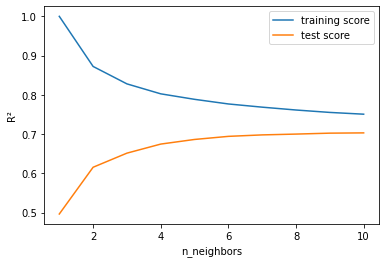

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

training_score = []
test_score = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 # build the model
 knn = KNeighborsRegressor(n_neighbors=n_neighbors)
 knn.fit(X_train, y_train)
 # record training set score
 training_score.append(knn.score(X_train, y_train))
 # record test set score
 test_score.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_score, label="training score")
plt.plot(neighbors_settings, test_score, label="test score")
plt.ylabel("R²")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig("knn_compare_model")

The above plot shows the training and test set R² on the y-axis against the setting of n_neighbors on the x-axis. Considering if we choose one single nearest neighbor, the prediction on the training set is perfect.

But when more neighbors are considered, the training set R² drops, indicating that using the single nearest neighbor leads to a model that is too complex. The best performance is somewhere around 10 neighbors.

*The plot suggests that we should choose n_neighbors=10. Here we are:*

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
k1 = knn.score(X_train, y_train)
k2 = knn.score(X_test, y_test)
print("R² of KNN Regressor on training set: {:.3f}".format(k1))
print("R² of KNN Regressor on test set: {:.3f}".format(k2))

R² of KNN Regressor on training set: 0.751
R² of KNN Regressor on test set: 0.703


## 3. Decison Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)
t1 = tree.score(X_train, y_train)
t2 = tree.score(X_test, y_test)

print("R² of Decision Tree Regressor on training set: {:.3f}".format(t1))
print("R² of Decision Tree Regressor on test set: {:.3f}".format(t2))

R² of Decision Tree Regressor on training set: 1.000
R² of Decision Tree Regressor on test set: 0.598


*The R² on the training set is 100%, while the test set R² is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data.*

Therefore, we need to apply pre-pruning to the tree. We set max_depth=7, limiting the depth of the tree decreases overfitting. This leads to a lower R² on the training set, but an improvement on the test set.

In [ ]:
tree1 = DecisionTreeRegressor(max_depth=3, random_state=0)
tree1.fit(X_train, y_train)
t3 = tree1.score(X_train, y_train)
t4 = tree1.score(X_test, y_test)

print("R² of Decision Tree Regressor on training set: {:.3f}".format(t3))
print("R² of Decision Tree Regressor on test set: {:.3f}".format(t4))

R² of Decision Tree Regressor on training set: 0.530
R² of Decision Tree Regressor on test set: 0.541


**Feature Importance in Decision Tree Regressor**

Feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target”.

The feature importances always sum to 1:

In [ ]:
print("Feature importances:\n{}".format(tree1.feature_importances_))

Feature importances:
[0.847937   0.         0.02751301 0.         0.         0.12454998
 0.         0.        ]


Then we can visualize the feature importances:

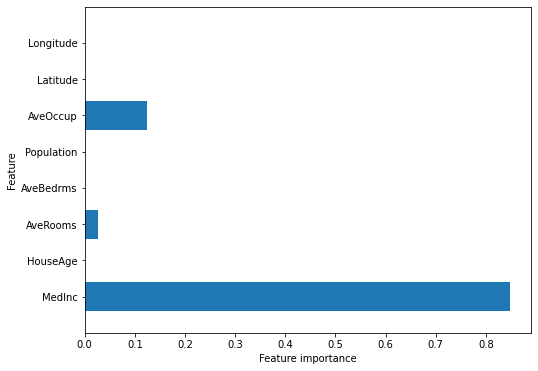

In [ ]:
dataset_scaled_features = [x for i,x in enumerate(dataset_scaled.columns) if i!=8]

def plot_feature_importances_housing(model):
 plt.figure(figsize=(8,6))
 n_features = 8
 plt.barh(range(n_features), model.feature_importances_, align="center")
 plt.yticks(np.arange(n_features), dataset_scaled_features)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
 plt.ylim(-1, n_features)

plot_feature_importances_housing(tree1)
plt.savefig("feature_importance")

*Feature “MedInc” is by far the most important feature.*

## 4. Random Forest Regressor

Let’s apply a Random Forest Regressor consisting of 100 trees on the housing data set:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)

print("R² of Random Forest Regressor on training set: {:.3f}".format(r1))
print("R² of Random Forest Regressor on test set: {:.3f}".format(r2))

R² of Random Forest Regressor on training set: 0.972
R² of Random Forest Regressor on test set: 0.809


*The random forest gives us a R² 80.9%, better than the linear regression model or a single decision tree, without tuning any parameters. However, we can adjust the max_features setting, to see whether the result can be improved.*

In [ ]:
rf1 = RandomForestRegressor(max_depth=7, n_estimators=100, random_state=42)
rf1.fit(X_train, y_train)
r3 = rf1.score(X_train, y_train)
r4 = rf1.score(X_test, y_test)

print("R² of Random Forest Regressor on training set: {:.3f}".format(r3))
print("R² of Random Forest Regressor on test set: {:.3f}".format(r4))

R² of Random Forest Regressor on training set: 0.765
R² of Random Forest Regressor on test set: 0.735


*It did not, this indicates that the default parameters of the random forest work well.*

**Feature importance in Random Forest Regressor**

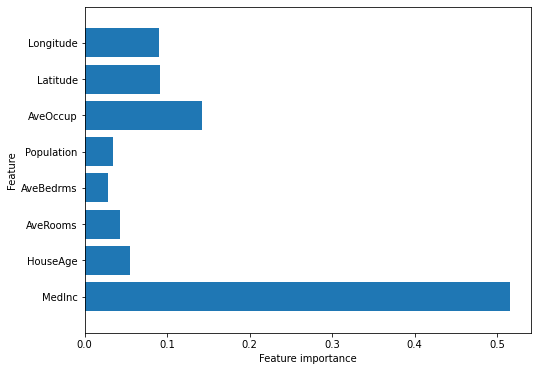

In [ ]:
plot_feature_importances_housing(rf)

Similarly to the single decision tree, the random forest also gives a lot of importance to the “Medinc” feature, and also chooses “AveOccp” to be the 2nd most informative feature overall. The randomness in building the random forest forces the algorithm to consider many possible explanations, the result being that the random forest captures a much broader picture of the data than a single tree.

## 5.Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=0)
gb.fit(X_train, y_train)
g1 = gb.score(X_train, y_train)
g2 = gb.score(X_test, y_test)

print("R^2 of Gradient Boosting Regressor on training set: {:.3f}".format(g1))
print("R^2 of Gradient Boosting Regressor on test set: {:.3f}".format(g2))

R^2 of Gradient Boosting Regressor on training set: 0.810
R^2 of Gradient Boosting Regressor on test set: 0.795


*We are likely to be generalizing. Let’s try to improve the results by either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate:*

In [ ]:
gb1 = GradientBoostingRegressor(random_state=0, max_depth=4)
gb1.fit(X_train, y_train)
g3 = gb1.score(X_train, y_train)
g4 = gb1.score(X_test, y_test)

print("R² of Gradient Boosting Regressor on training set: {:.3f}".format(g3))
print("R² of Gradient Boosting Regressor on test set: {:.3f}".format(g4))

R² of Gradient Boosting Regressor on training set: 0.841
R² of Gradient Boosting Regressor on test set: 0.812


In [ ]:
gb2 = GradientBoostingRegressor(random_state=0, learning_rate=0.15)
gb2.fit(X_train, y_train)
g5 = gb2.score(X_train, y_train)
g6 = gb2.score(X_test, y_test)

print("R² of Gradient Boosting Regressor on training set: {:.3f}".format(g5))
print("R² of Gradient Boosting Regressor on test set: {:.3f}".format(g6))

R² of Gradient Boosting Regressor on training set: 0.823
R² of Gradient Boosting Regressor on test set: 0.802


*Both methods of decreasing the model complexity increased both the training set R² and the test set R², as expected. However, in this case, none of these methods increased the generalization performance of the test set.*

We can visualize the feature importances to get more insight into our model even though we are not really happy with the model:

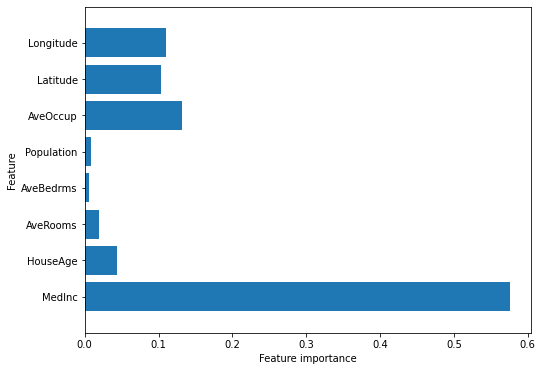

In [ ]:
plot_feature_importances_housing(gb1)

*We can see that the feature importances of the gradient boosted trees are similar to the feature importances of the random forests, it gives weight to all of the features in this case.*

## 6.Support Vector Regressor



> SVM requires all the features to vary on a similar scale.



In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
s1 = svr.score(X_train, y_train)
s2 = svr.score(X_test, y_test)

print("R² of Support Vector Regressor on training set: {:.3f}".format(s1))
print("R² of Support Vector Regressor on test set: {:.3f}".format(s2))

R² of Support Vector Regressor on training set: 0.716
R² of Support Vector Regressor on test set: 0.721




>  In some cases we can be underfitting, where training and test set performance are quite similar but less close to 100% accuracy. From here, we can try increasing either gamma or C to fit a more complex model.



In [ ]:
svr2 = SVR(gamma=10)
svr2.fit(X_train, y_train)
s5 = svr2.score(X_train, y_train)
s6 = svr2.score(X_test, y_test)

print("R² of Support Vector Regressor on training set: {:.3f}".format(s5))
print("R² of Support Vector Regressor on test set: {:.3f}".format(s6))

R² of Support Vector Regressor on training set: 0.904
R² of Support Vector Regressor on test set: 0.233


*The model performed worse on the test data after increasing gamma.The default value of the SVR is best.*

## 7.Deep Learning



> Deep learning algorithms also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. We must re-scale our data so that it fulfills these requirements.



In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=42)
mlp.fit(X_train, y_train)
m1 = mlp.score(X_train, y_train)
m2 = mlp.score(X_test, y_test)

print("R² of MLP Regressor on training set: {:.3f}".format(m1))
print("R² of MLP Regressor on test set: {:.3f}".format(m2))

R² of MLP Regressor on training set: 0.703
R² of MLP Regressor on test set: 0.364


*We can notice that the model performed well in the trained data and very bad in testing data.*

Let’s try to increase the number of iterations:

In [ ]:
mlp2 = MLPRegressor(max_iter=1000, random_state=0)
mlp2.fit(X_train, y_train)
m5 = mlp2.score(X_train, y_train)
m6 = mlp2.score(X_test, y_test)

print("R² of MLP Regressor on training set: {:.3f}".format(m5))
print("R² of MLP Regressor on test set: {:.3f}".format(m6))

R² of MLP Regressor on training set: 0.093
R² of MLP Regressor on test set: -5.671


Increasing the number of iterations gived a worse result.

Let’s increase the alpha parameter and add stronger regularization of the weights:

In [ ]:
mlp3 = MLPRegressor(max_iter=1000, alpha=1, random_state=0)
mlp3.fit(X_train, y_train)
m7 = mlp3.score(X_train, y_train)
m8 = mlp3.score(X_test, y_test)

print("R² of MLP Regressor on training set: {:.3f}".format(m7))
print("R² of MLP Regressor on test set: {:.3f}".format(m8))

R² of MLP Regressor on training set: 0.436
R² of MLP Regressor on test set: -2.073


The result is not good either.



---



---



# CONCLUSION

In [ ]:
models = ['Linear Regression','KNN Regressor', 'Decision Tree Regressor' ,'Random Forest Regressor',
 'Gradient Boosting Regressor','Support Vector Regressor', 'MLP Regressor']
tests_score = [l2,k2, t4, r2, g4, s2, m1]
compare_models = pd.DataFrame({ 'Algorithms': models, 'Tests Score': tests_score })
compare_models.sort_values(by = 'Tests Score', ascending = False)

,Algorithms,Tests Score
4,Gradient Boosting Regressor,0.811751
3,Random Forest Regressor,0.808916
5,Support Vector Regressor,0.721047
1,KNN Regressor,0.703027
6,MLP Regressor,0.702834
0,Linear Regression,0.599880
2,Decision Tree Regressor,0.540995


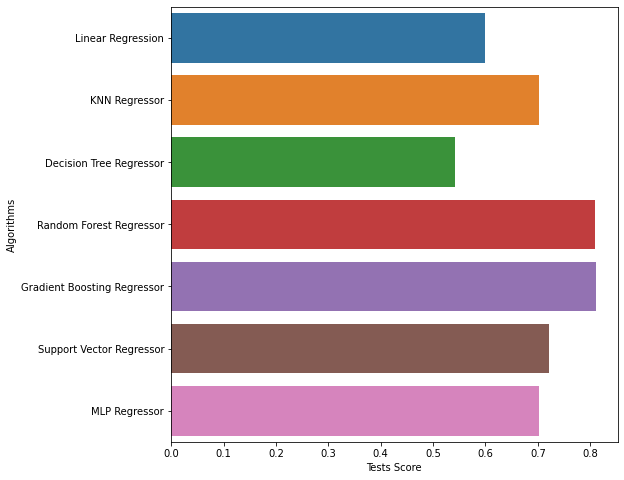

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x = 'Tests Score', y = 'Algorithms', data = compare_models)
plt.show()

# PREDICTION WITH TEST DATA

## 1.   Linear Regression




In [ ]:
reg_pred=linreg.predict(X_test)
reg_pred

array([ 0.46399188, -0.46787529,  0.4324548 , ...,  0.21358809,
        1.09862216, -0.34966386])

### Assumptions

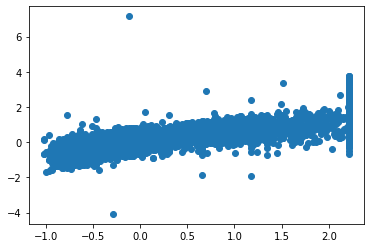

In [ ]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)



> Residuals in a statistical or machine learning model are the differences between observed and predicted values of data. They are a diagnostic measure used when assessing the quality of a model. They are also known as errors.



In [ ]:
## Residuals
residuals=y_test-reg_pred
residuals

11084   -0.099479
19402   -0.208783
1741    -0.779053
15775    1.667652
9074    -0.446771
           ...   
11706    0.387031
4392    -0.225854
7369    -0.296964
17220    0.293970
5129    -0.205030
Name: Price, Length: 6192, dtype: float64

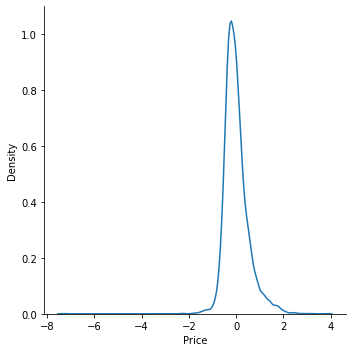

In [ ]:
## Plot the residuals 

sns.displot(residuals,kind="kde")

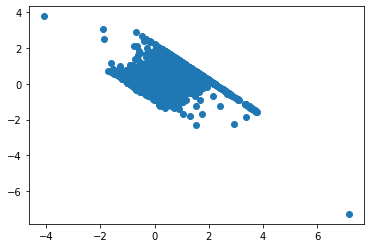

In [ ]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.3669280310940978
0.2604662664409502
0.5103589584213745


### R square and adjusted R square

**R^2 = 1 - SSR/SST**

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5998798078170859


 **Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [ ]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.59936210418819

# Pickling The Model file For Deployment

Since the **Gradient Boosting Regressor	** performed better than the other models we will use it for the deployment.

In [ ]:
import pickle

In [ ]:
pickle.dump(gb,open('regmodel.pkl','wb'))

In [ ]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))